 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [517]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [518]:
# Reading whale returns
whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
...                                 ...                     ...  
2019-04-25                    -0.005153                0.004848  
2019-04-26                     0.012355                0.010434  
2019-04-29                     0.006251                0.005223  
2019-04-30                    -0.000259               -0.003702  
2019-05-01                    -0.007936               -0.007833  

[1060 rows x 4 columns]

In [519]:
# Count nulls
whale_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [520]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [521]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True, infer_datetime_format=True)

In [522]:
# Count nulls
algo_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [523]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [524]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("./Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_history_csv,index_col="Date", parse_dates=True, infer_datetime_format=True)

In [525]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [526]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '')

/var/folders/08/t8s0cr094wxcqgznjw0yylcr0000gn/T/ipykernel_53719/3738734956.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')


In [527]:
# Calculate Daily Returns
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float')
sp_tsx_df['Close'] = sp_tsx_df['Close'].pct_change()

In [528]:
# Drop nulls
sp_tsx_df.dropna(inplace=True)

In [529]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df.rename(columns={'Close':'S&P TSX'}, inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [530]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
was_combined_df = pd.concat([whale_df, algo_df, sp_tsx_df], axis='columns', join='inner')

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of All Portfolios - Combined'}, xlabel='Date'>

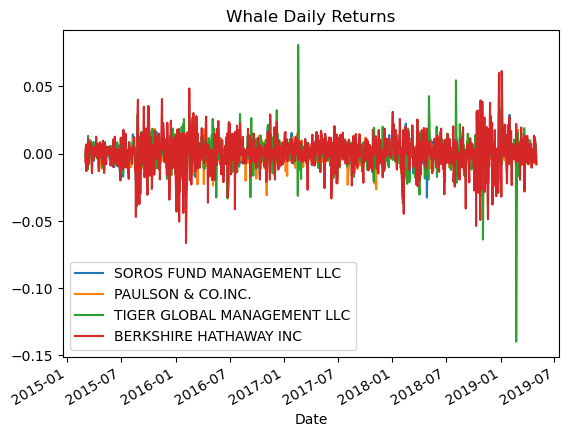

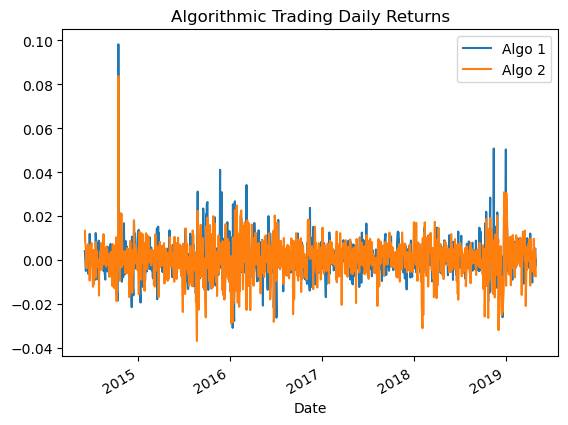

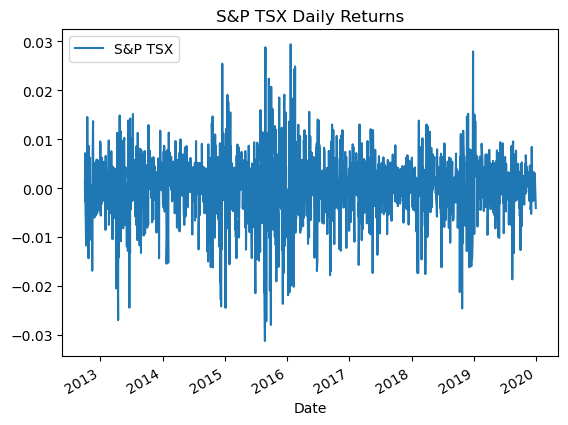

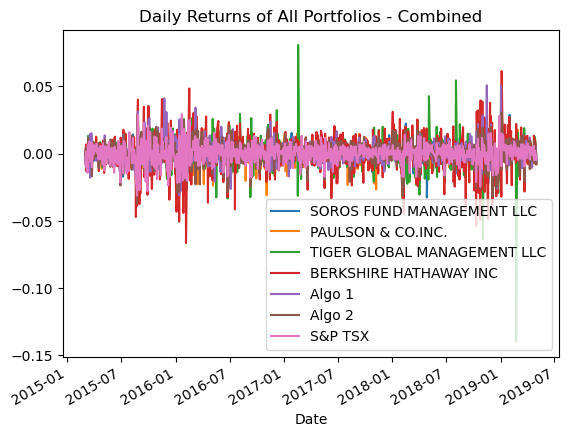

In [531]:
# Plot daily returns of all portfolios
whale_df.plot(kind ='line', title = 'Whale Daily Returns')
algo_df.plot(kind ='line', title = 'Algorithmic Trading Daily Returns')
sp_tsx_df.plot(kind ='line', title = 'S&P TSX Daily Returns')
was_combined_df.plot(kind ='line', title = 'Daily Returns of All Portfolios - Combined')

#### Calculate and Plot cumulative returns.

In [532]:
# Calculate cumulative returns of all portfolios
whale_df_cumulative_returns = (1 + whale_df).cumprod()
algo_df_cumulative_returns = (1 + algo_df).cumprod()
sp_tsx_df_cumulative_returns = (1 + sp_tsx_df).cumprod()
was_combined_df_cumulative_returns = (1 + was_combined_df).cumprod()

<Axes: title={'center': 'Total Cumulative Returns'}, xlabel='Date'>

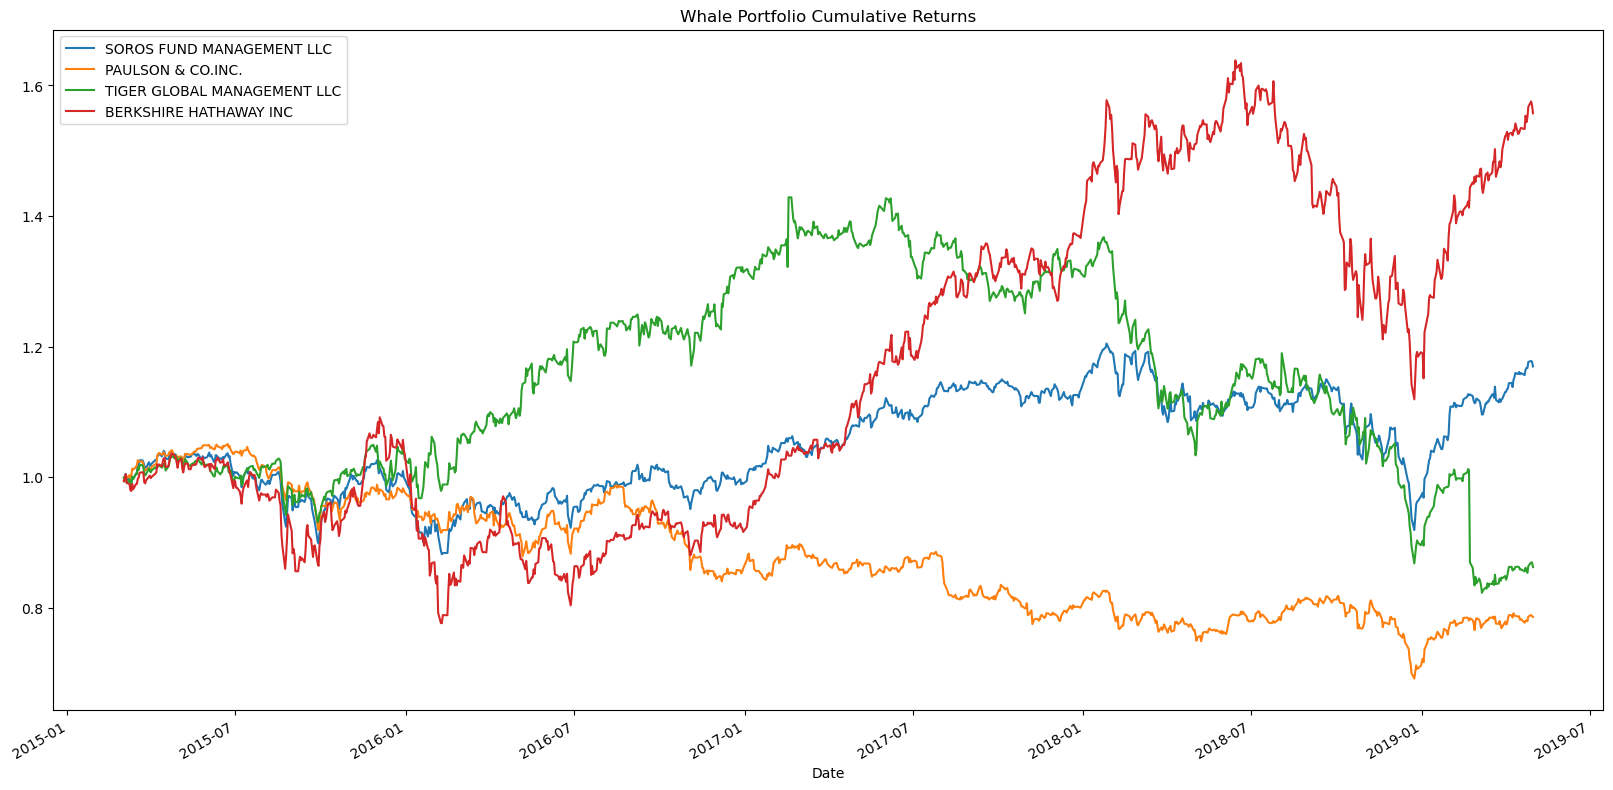

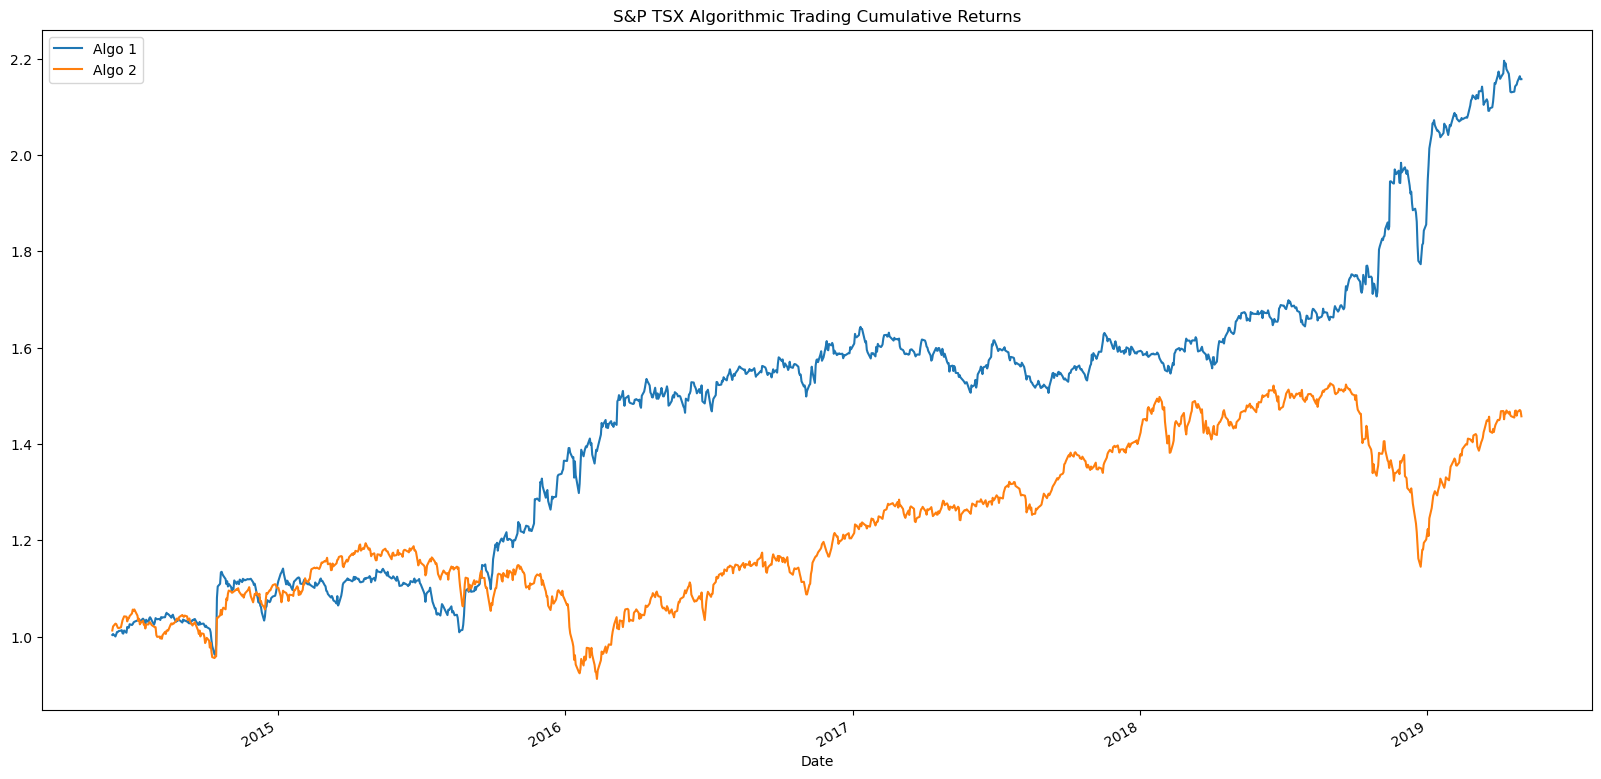

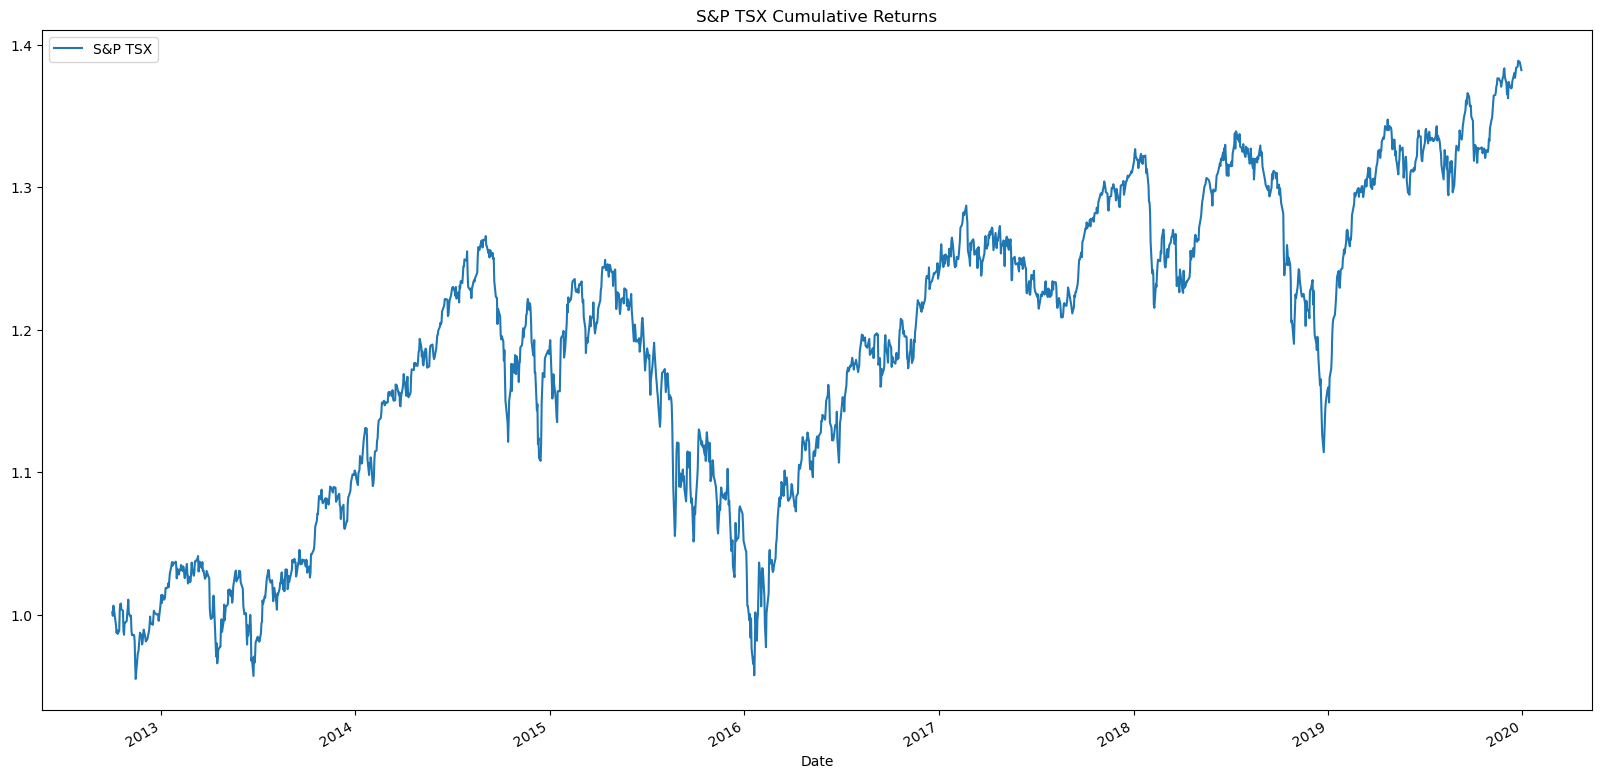

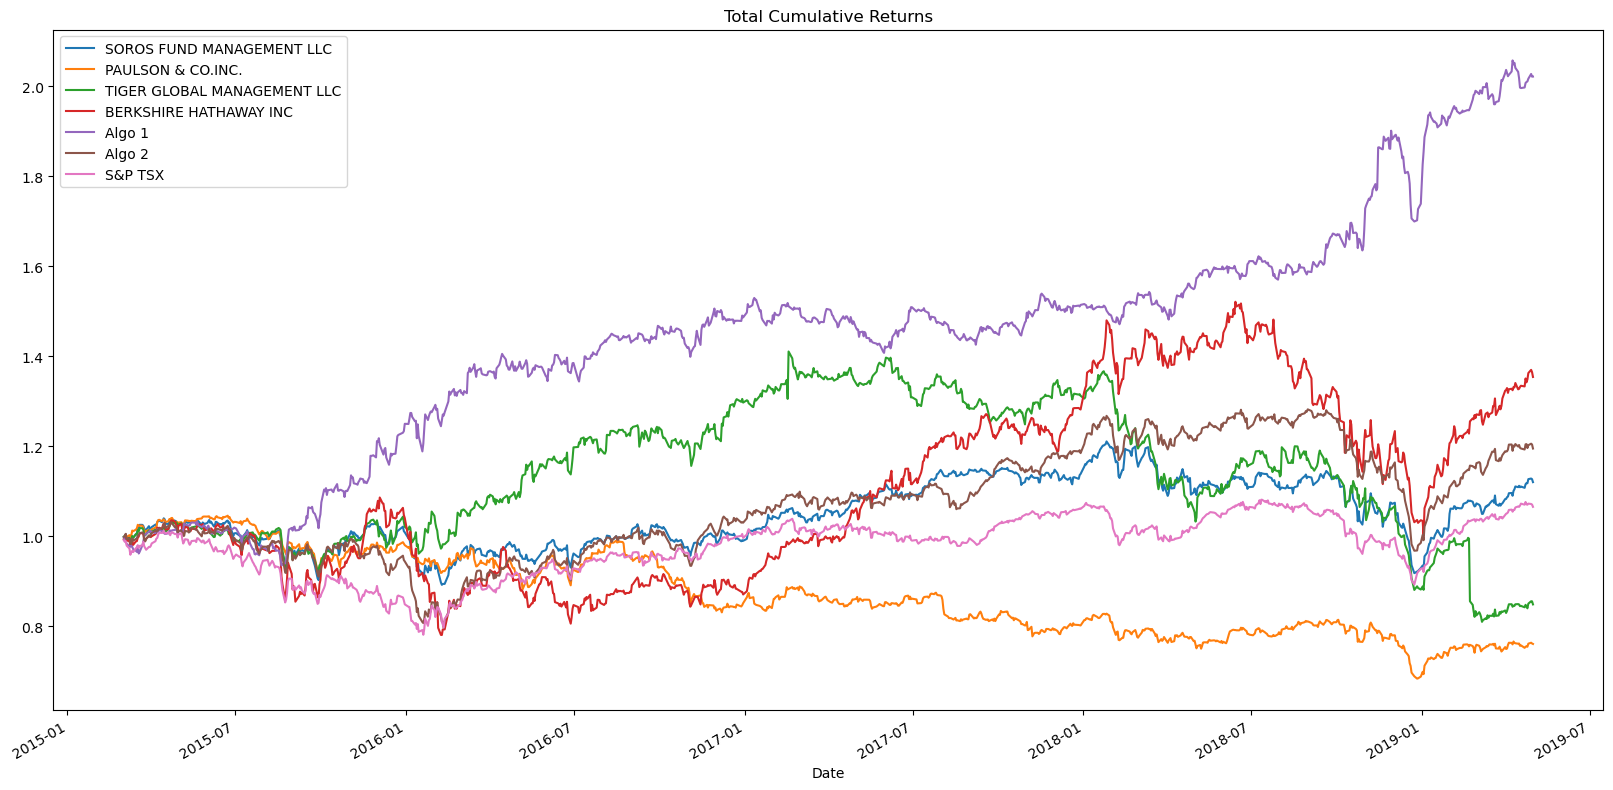

In [533]:
# Plot cumulative returns
whale_df_cumulative_returns.plot(figsize = (20,10), kind ='line', title='Whale Portfolio Cumulative Returns')
algo_df_cumulative_returns.plot(figsize = (20,10), kind ='line', title='S&P TSX Algorithmic Trading Cumulative Returns')
sp_tsx_df_cumulative_returns.plot(figsize = (20,10), kind ='line', title='S&P TSX Cumulative Returns')
was_combined_df_cumulative_returns.plot(figsize = (20,10), kind ='line', title='Total Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: title={'center': 'Risk: Combined Portfolios'}>

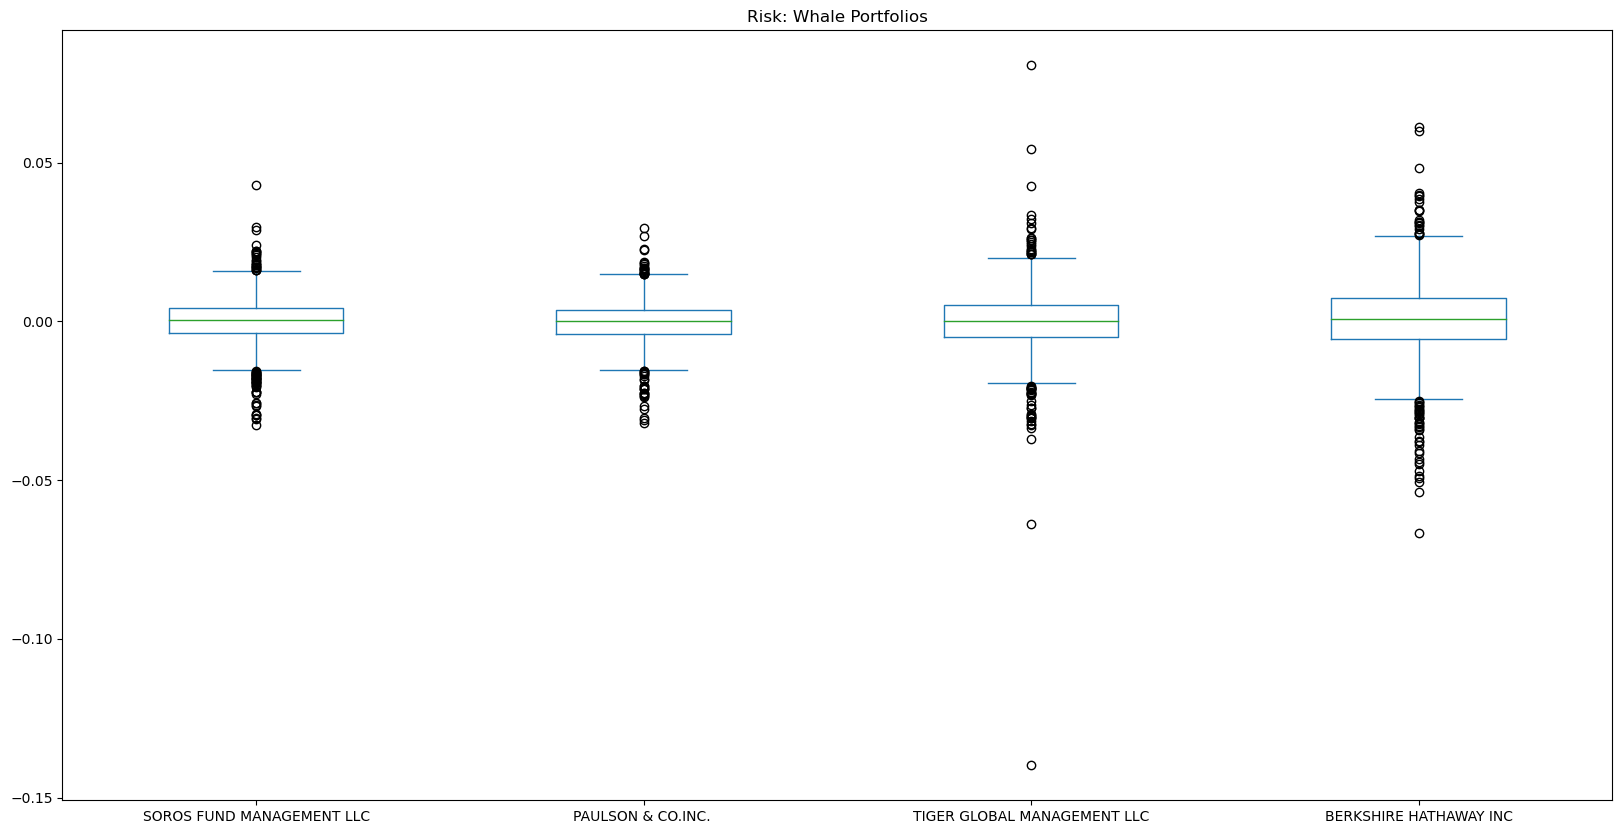

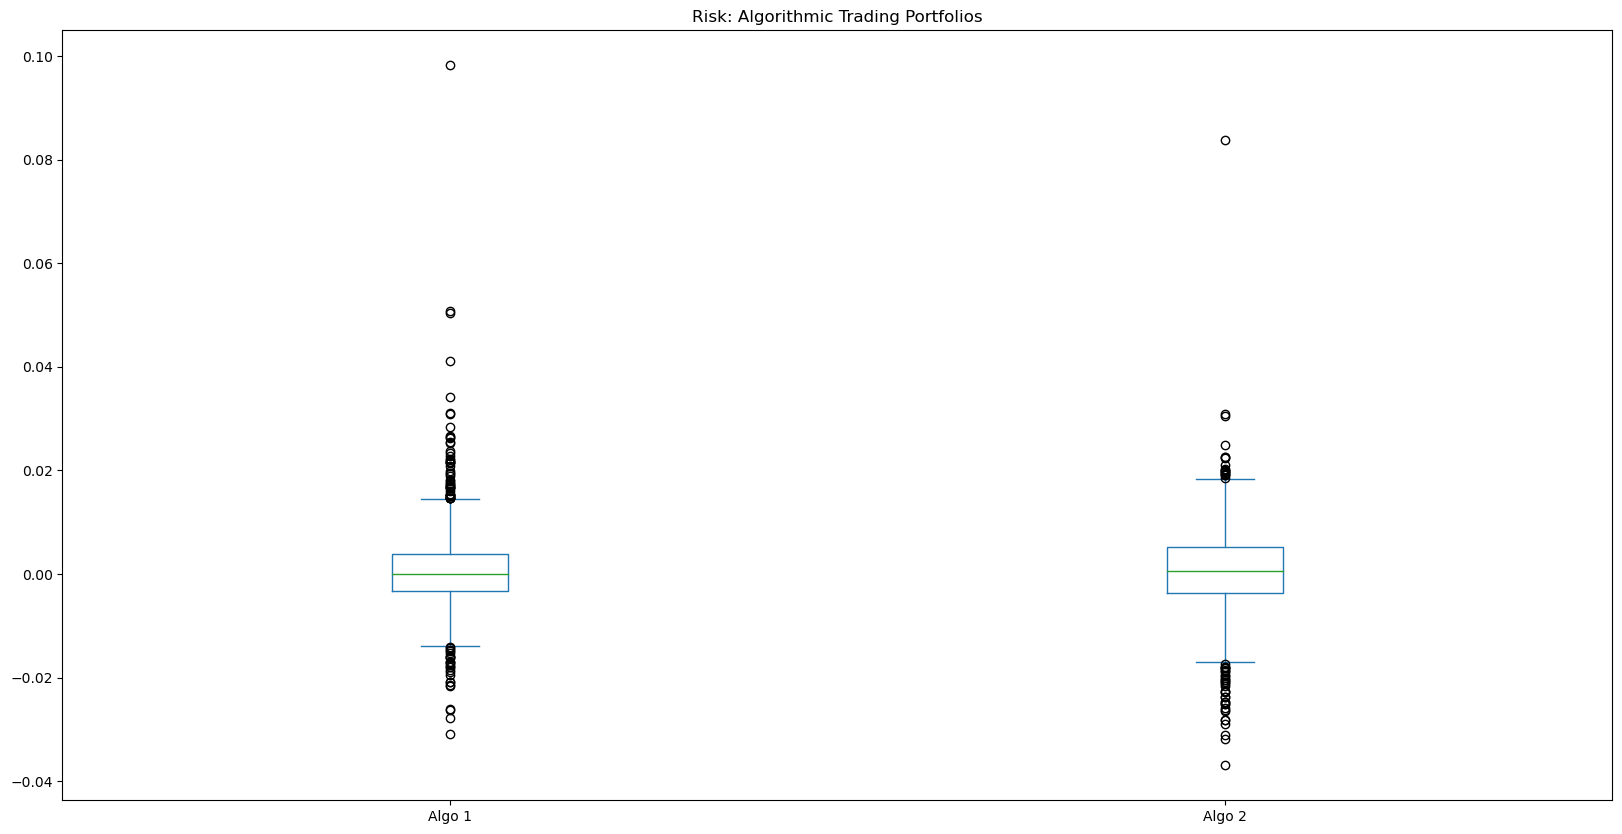

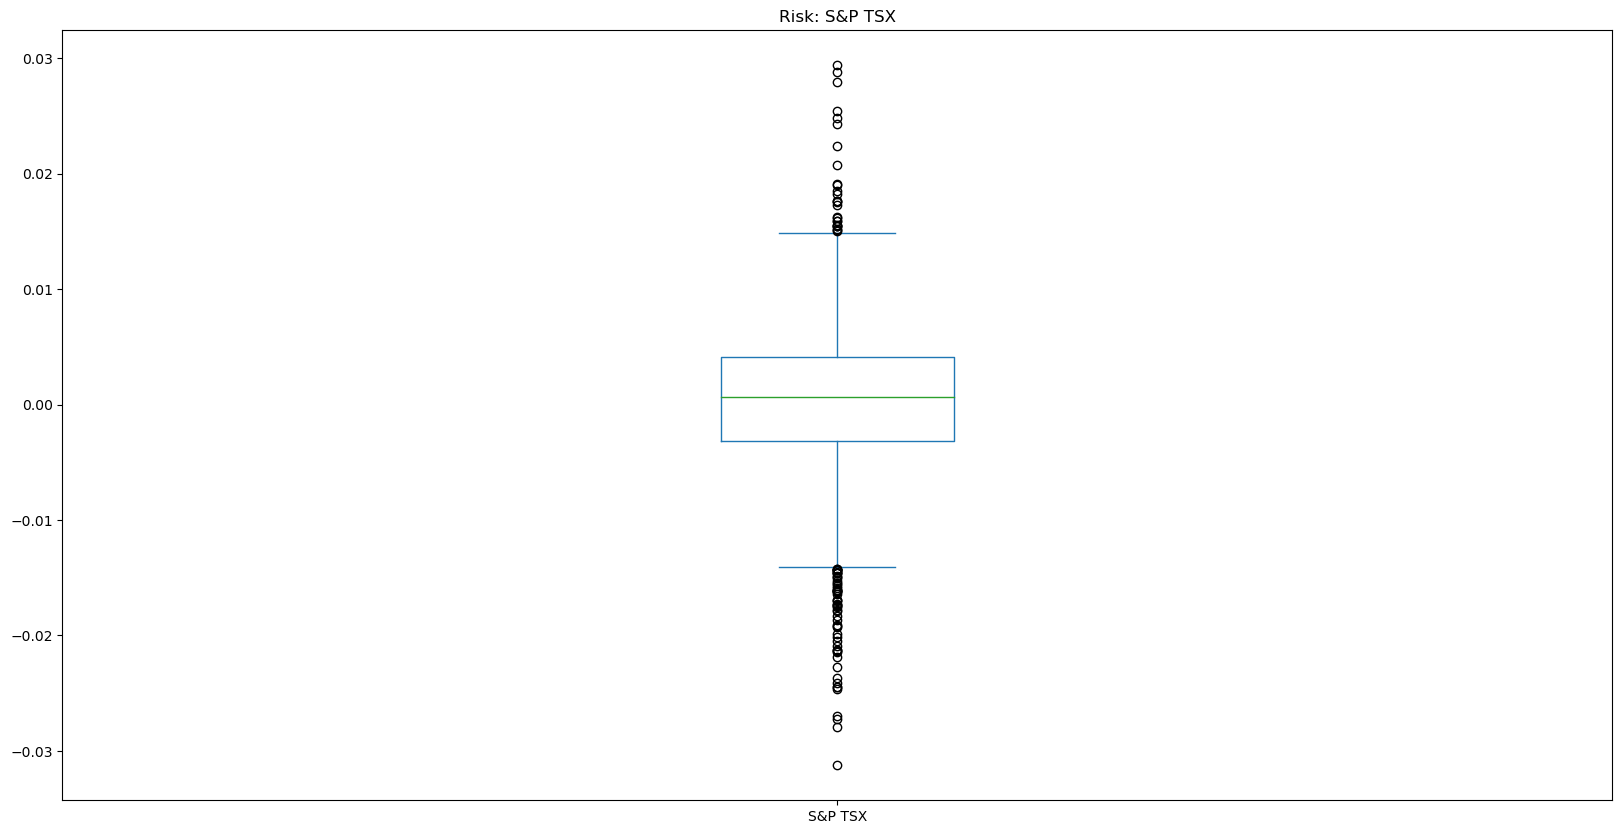

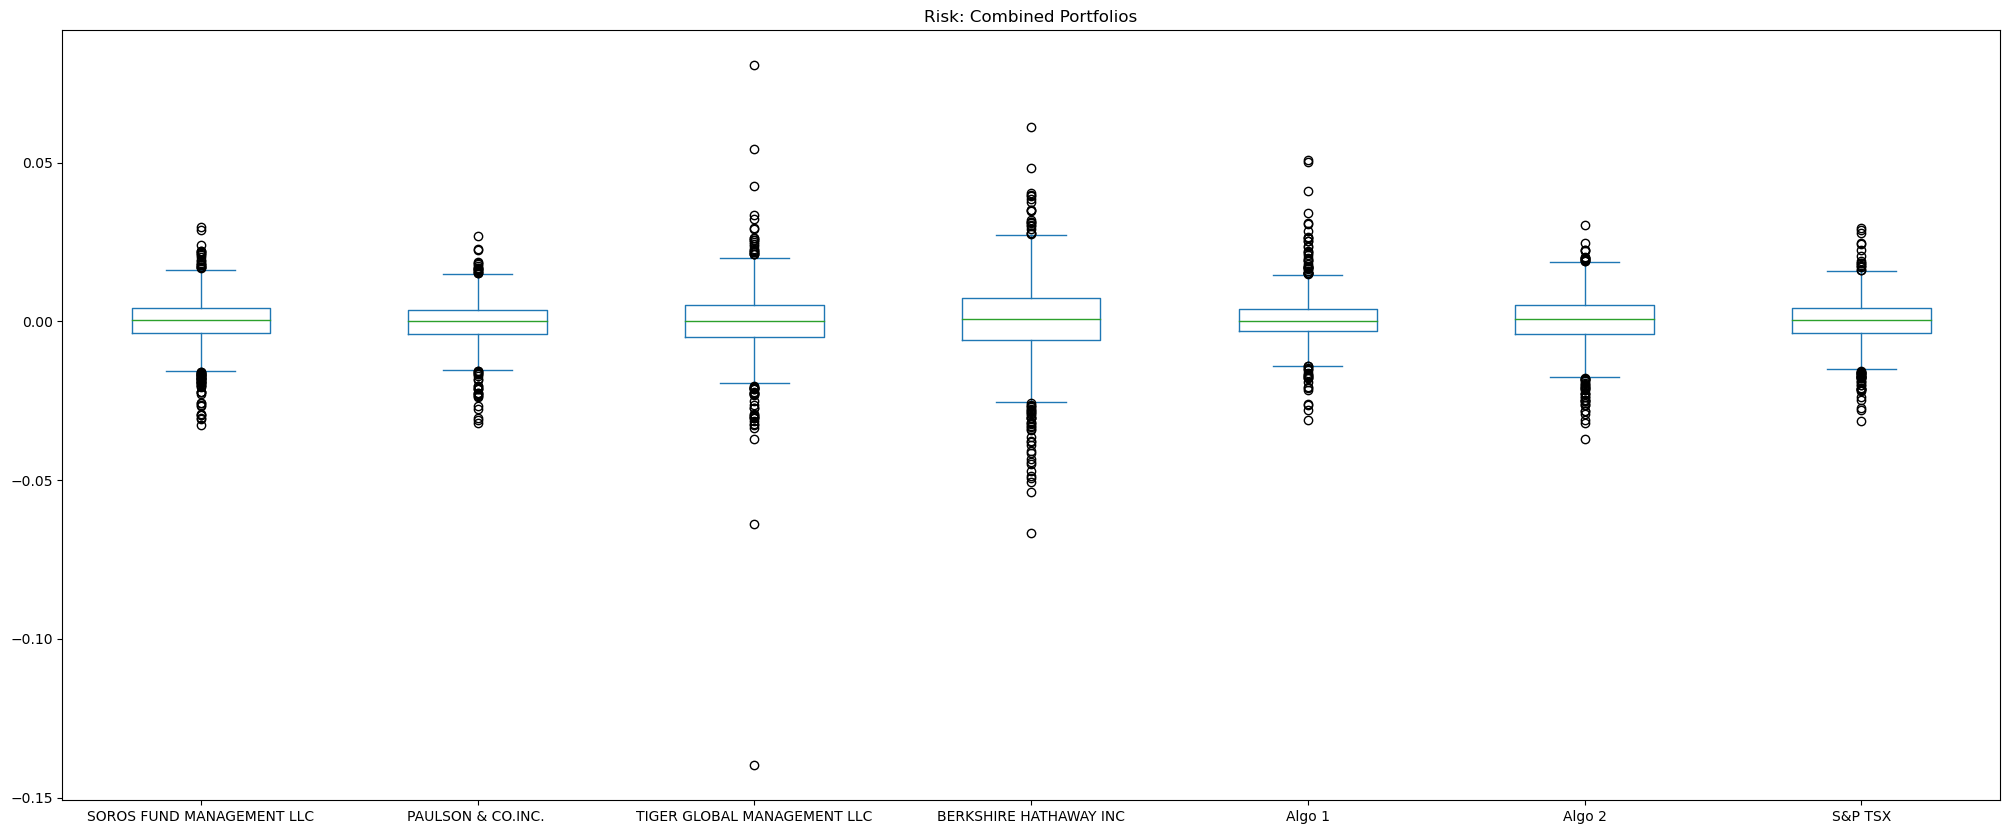

In [534]:
# Box plot to visually show risk
whale_df.plot(figsize = (20,10), kind='box', title = 'Risk: Whale Portfolios')
algo_df.plot(figsize = (20,10), kind ='box', title = 'Risk: Algorithmic Trading Portfolios')
sp_tsx_df.plot(figsize = (20,10), kind ='box', title = 'Risk: S&P TSX')
was_combined_df.plot(figsize = (25,10), kind='box', title = 'Risk: Combined Portfolios')

### Calculate Standard Deviations

In [535]:
# Calculate the daily standard deviations of all portfolios
whale_df_std = whale_df.std()
algo_df_std = algo_df.std()
was_combined_df_std = was_combined_df.std() * 100

### Determine which portfolios are riskier than the S&P TSX 60

In [536]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_df_std = sp_tsx_df.std()
# Determine which portfolios are riskier than the S&P TSX 60
print(was_combined_df_std)

SOROS FUND MANAGEMENT LLC      0.782758
PAULSON & CO.INC.              0.698232
TIGER GLOBAL MANAGEMENT LLC    1.088279
BERKSHIRE HATHAWAY INC         1.282552
Algo 1                         0.758888
Algo 2                         0.832636
S&P TSX                        0.703417
dtype: float64


<Axes: xlabel='Portfolios', ylabel='Percentage'>

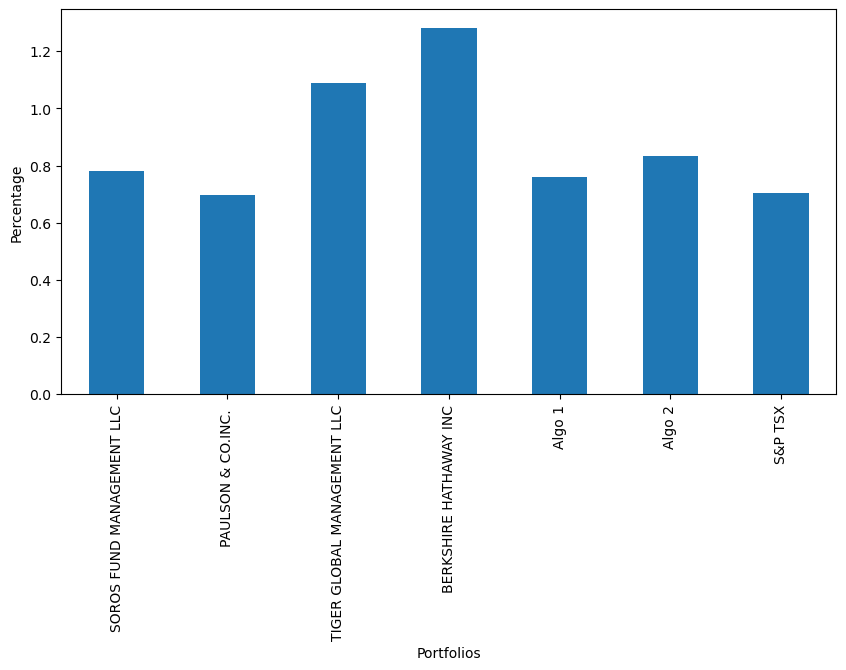

In [537]:
was_combined_df_std.plot(figsize = (10,5), kind='bar', xlabel = 'Portfolios', ylabel='Percentage')

### Calculate the Annualized Standard Deviation

In [538]:
# Calculate the annualized standard deviation (252 trading days)
annualised_whale_df_std = whale_df_std * np.sqrt(252)
annualised_algo_df_std = algo_df_std * np.sqrt(252)
annualised_sp_tsx_df_std = sp_tsx_df_std * np.sqrt(252)
annualised_was_combined_df_std = was_combined_df_std * np.sqrt(252)

<Axes: title={'center': 'Total Portfolio Annualised Standard Deviation'}>

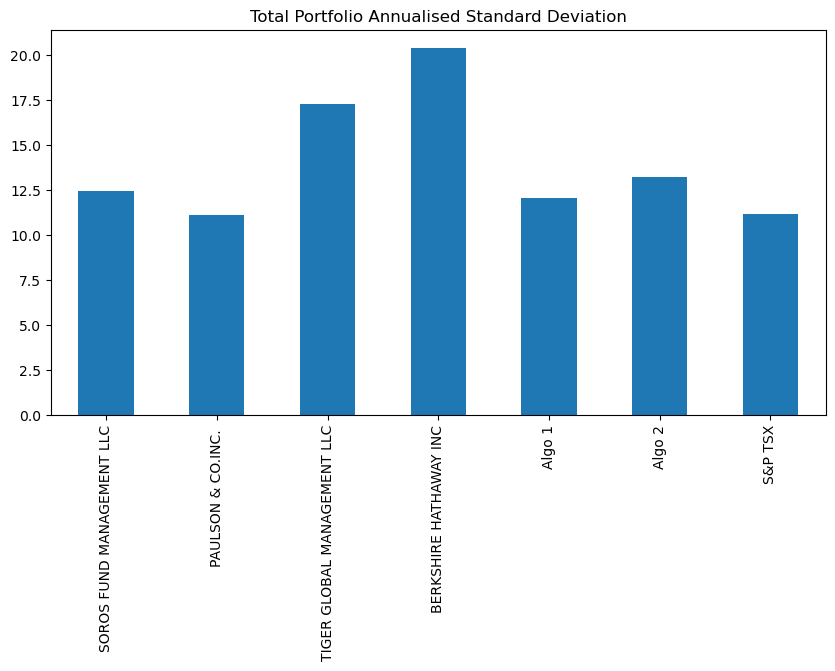

In [539]:
annualised_was_combined_df_std.plot(figsize = (10,5), kind ='bar', title='Total Portfolio Annualised Standard Deviation')

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Total Portfolio Annualised Standard Deviation'}, xlabel='Date'>

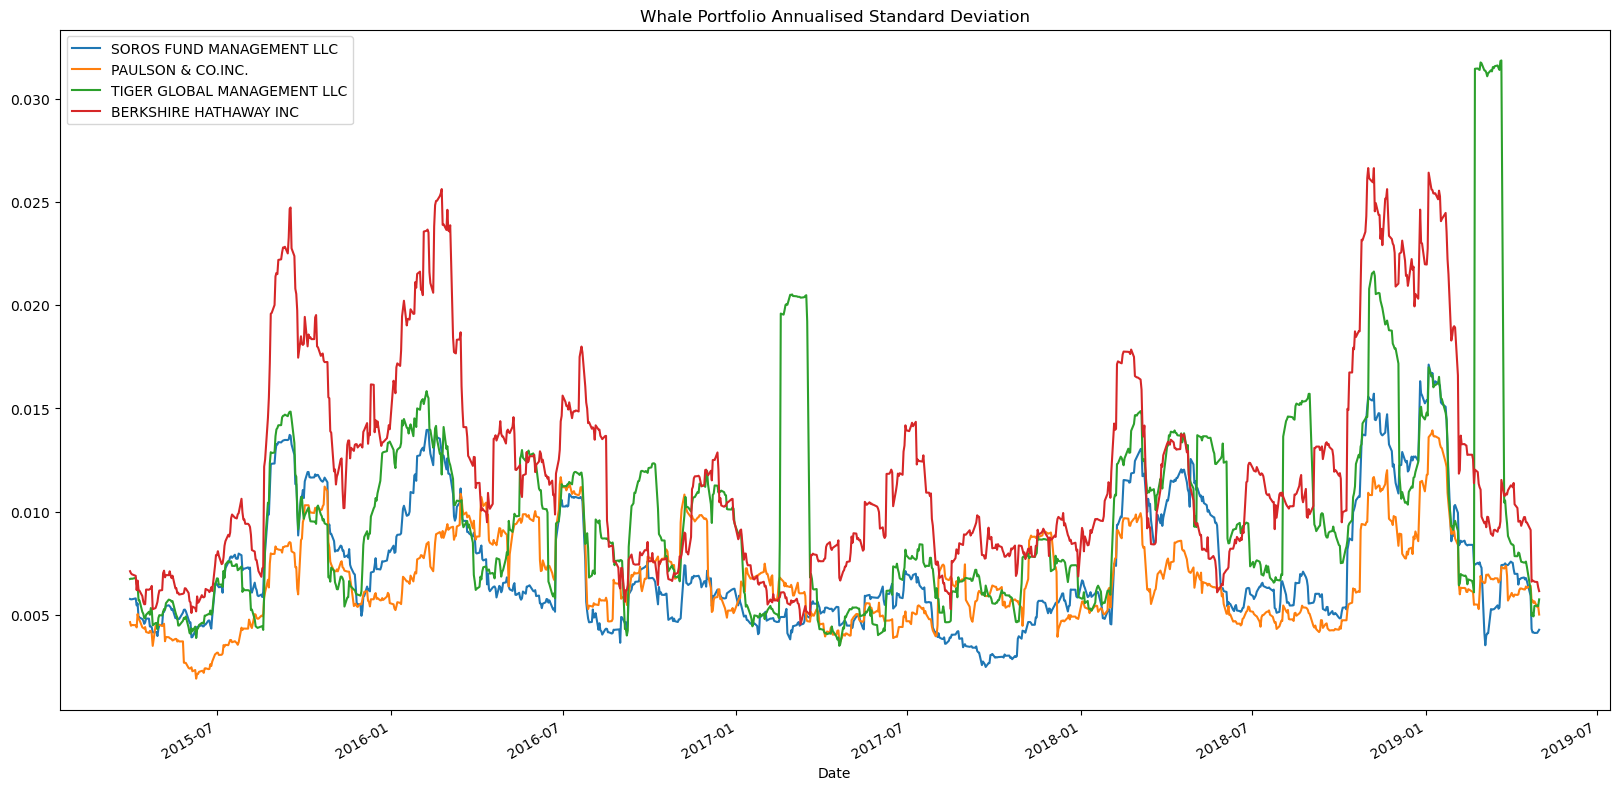

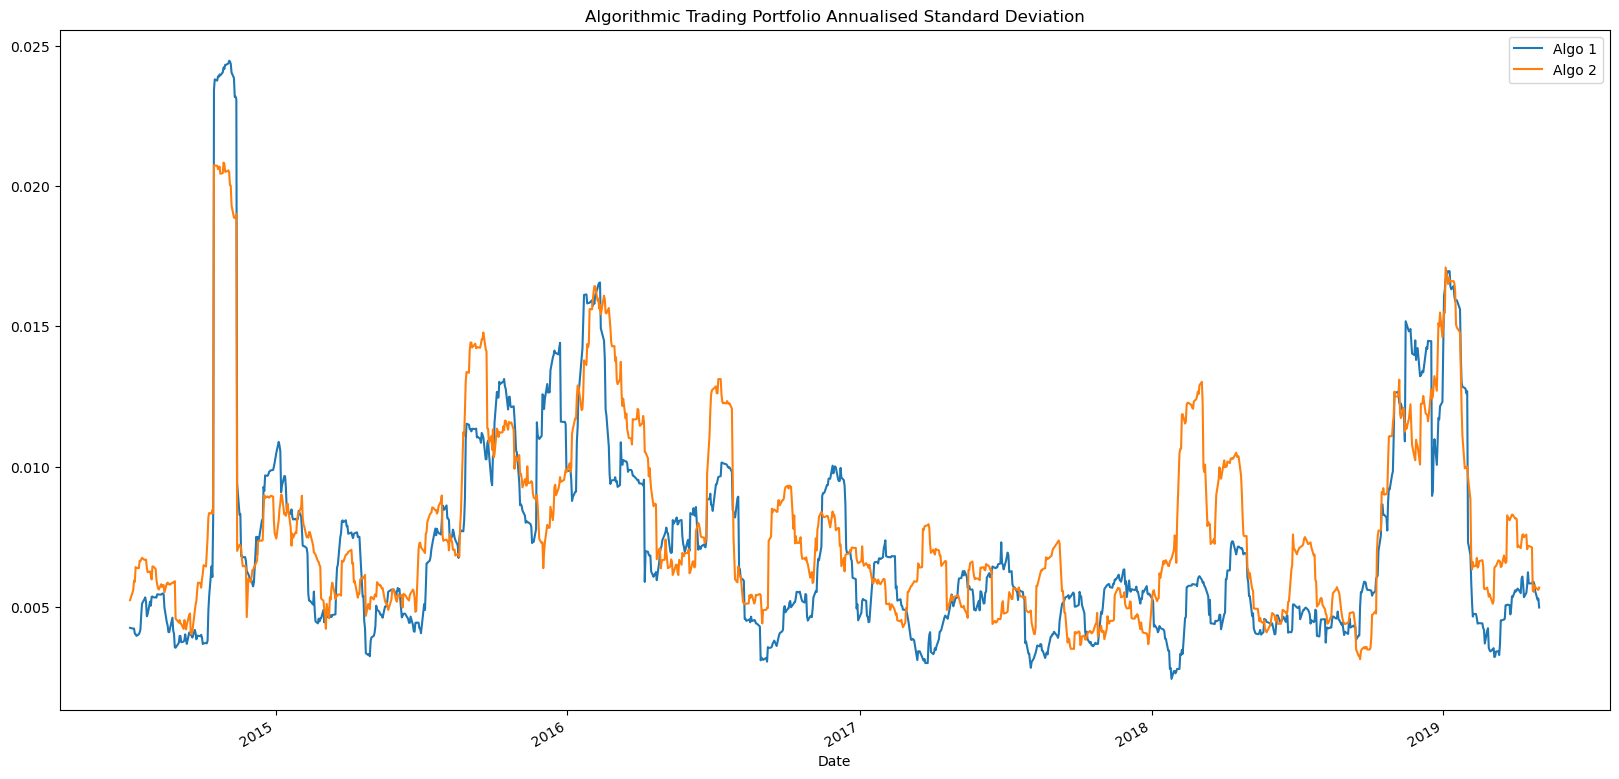

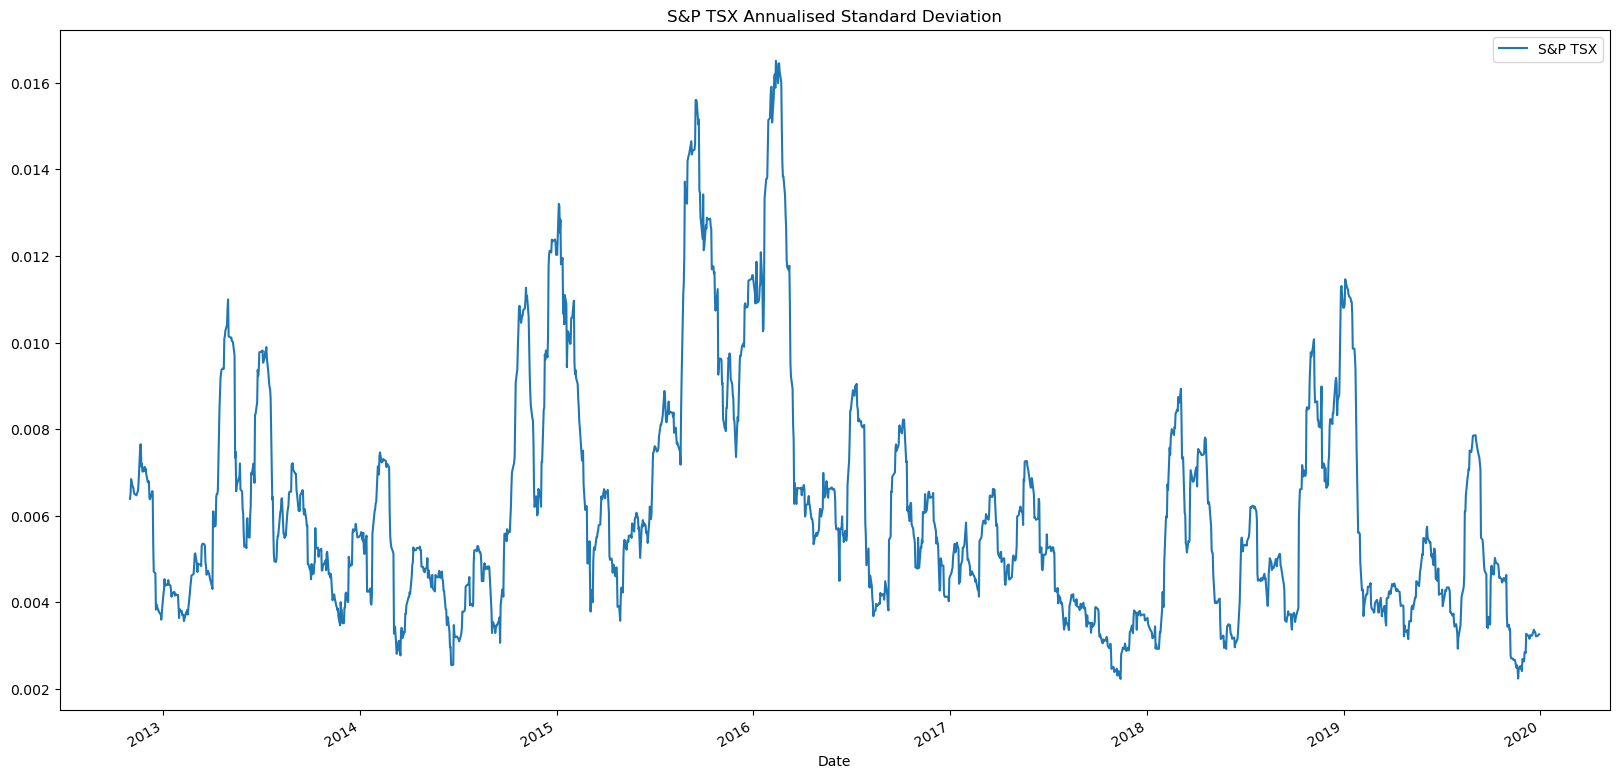

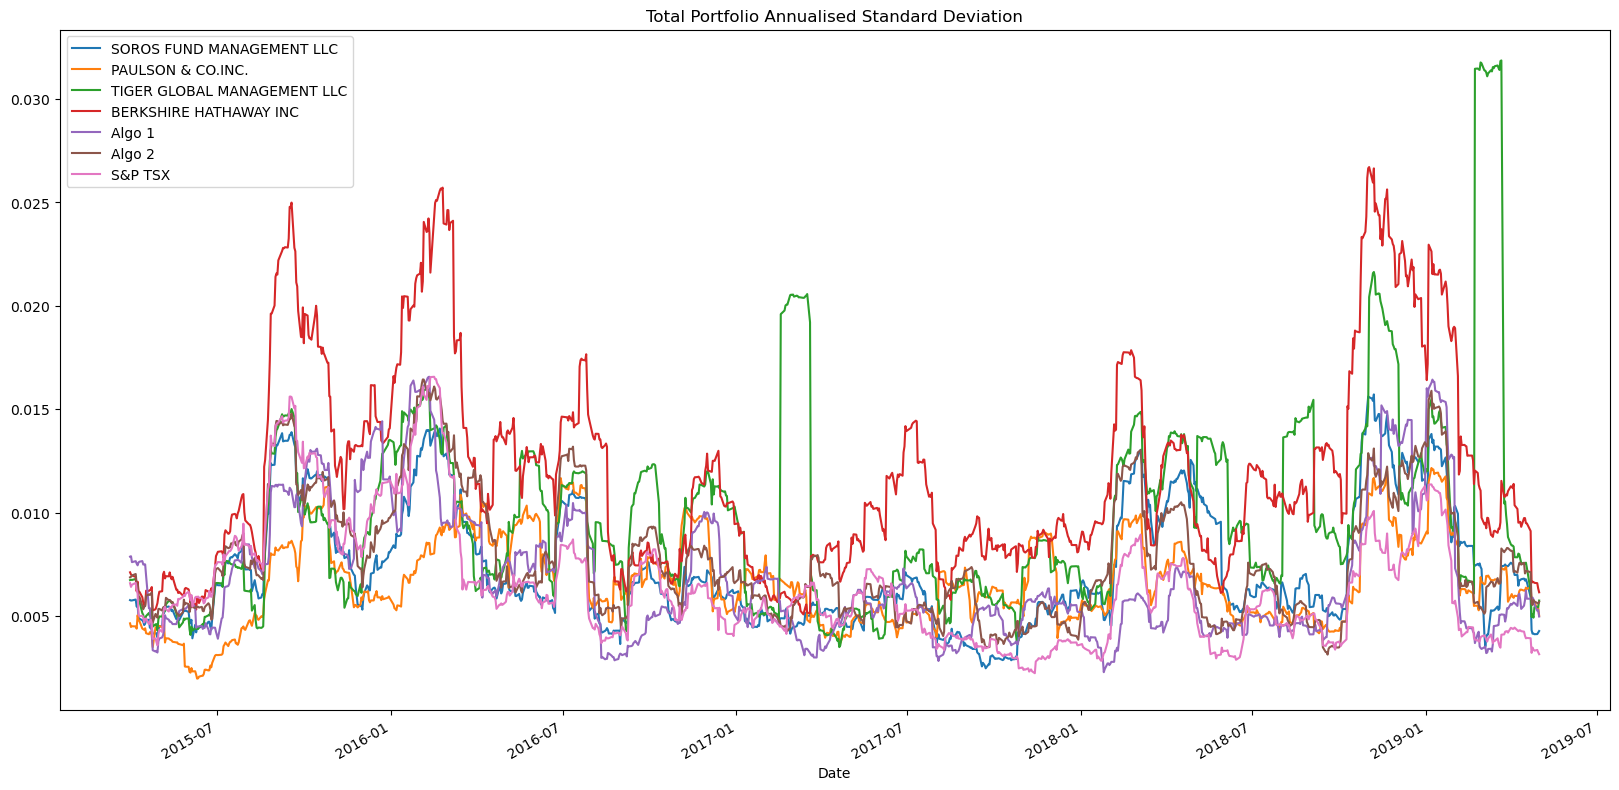

In [540]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_whale_df_std = whale_df.rolling(window=21).std()
rolling_algo_df_std = algo_df.rolling(window=21).std()
rolling_sp_tsx_df_std = sp_tsx_df.rolling(window=21).std()
rolling_was_combined_df_std = was_combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_whale_df_std.plot(figsize = (20,10), kind ='line', title='Whale Portfolio Annualised Standard Deviation')
rolling_algo_df_std.plot(figsize = (20,10), kind ='line', title='Algorithmic Trading Portfolio Annualised Standard Deviation')
rolling_sp_tsx_df_std.plot(figsize = (20,10), kind ='line', title='S&P TSX Annualised Standard Deviation')
rolling_was_combined_df_std.plot(figsize = (20,10), kind ='line', title='Total Portfolio Annualised Standard Deviation')

### Calculate and plot the correlation

<Axes: >

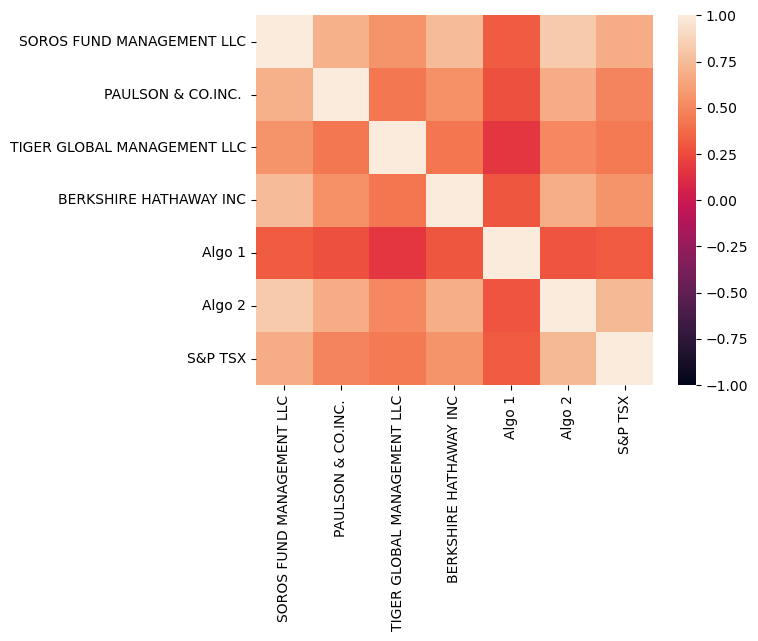

In [541]:
# Calculate the correlation
correlation = was_combined_df.corr()

# Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Beta Trend'}, xlabel='Date'>

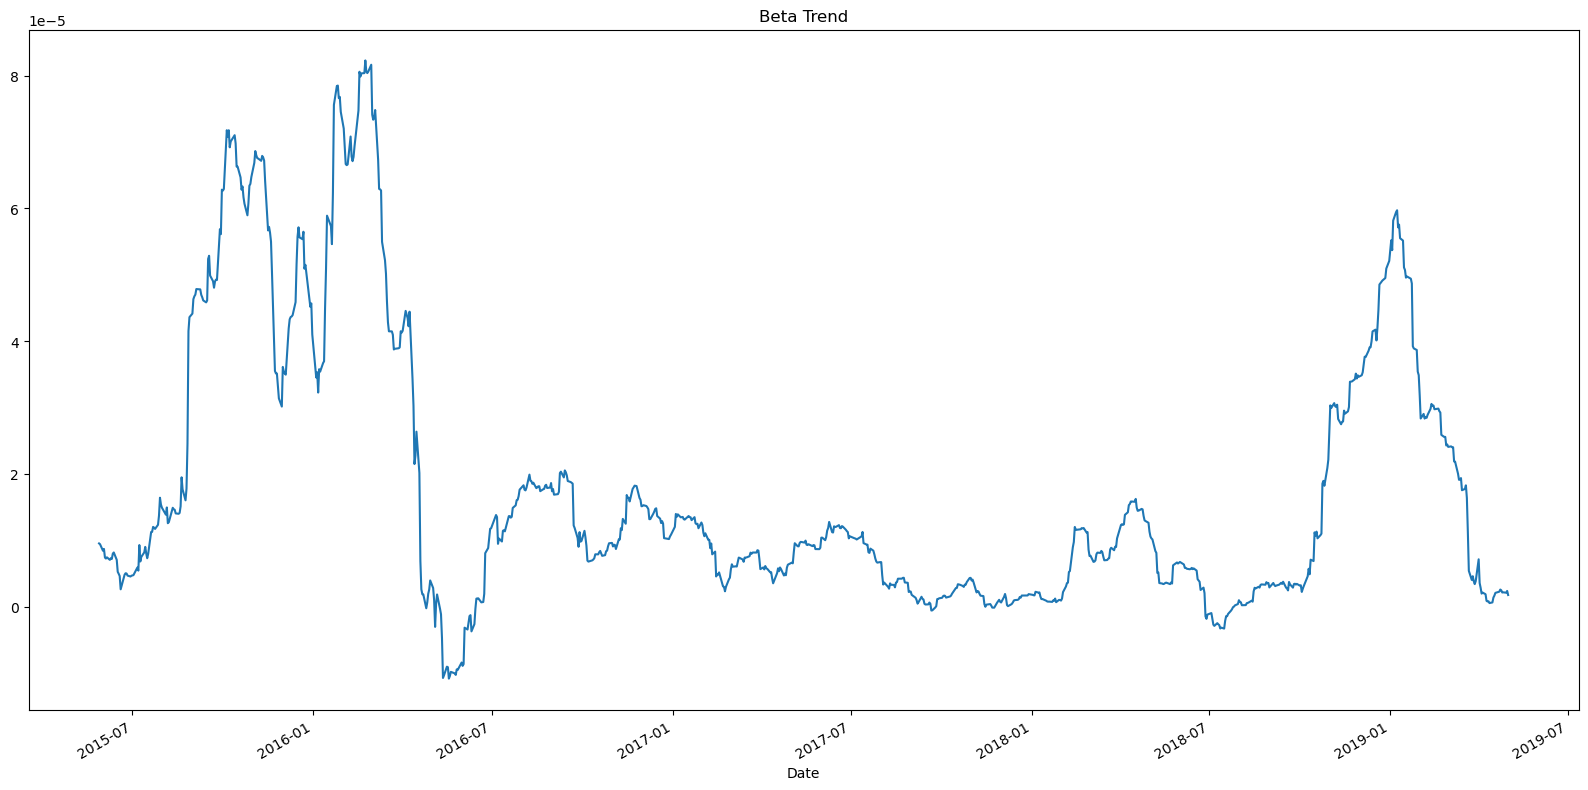

In [542]:
# Calculate covariance of a single portfolio
covariance_sp_and_algo = was_combined_df['Algo 1'].cov(was_combined_df['S&P TSX'])

# Calculate variance of S&P TSX
sp_variance = was_combined_df['S&P TSX'].var()

# Computing beta
beta_sp_and_algo = covariance_sp_and_algo / sp_variance

# Plot beta trend
beta_sp_and_algo_plot = was_combined_df['Algo 1'].rolling(window=60).cov(was_combined_df['S&P TSX'])
beta_sp_and_algo_plot.plot(figsize = (20,10), title = 'Beta Trend')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Total Portfolio Weighted Average: 21-Day-Halflife'}, xlabel='Date'>

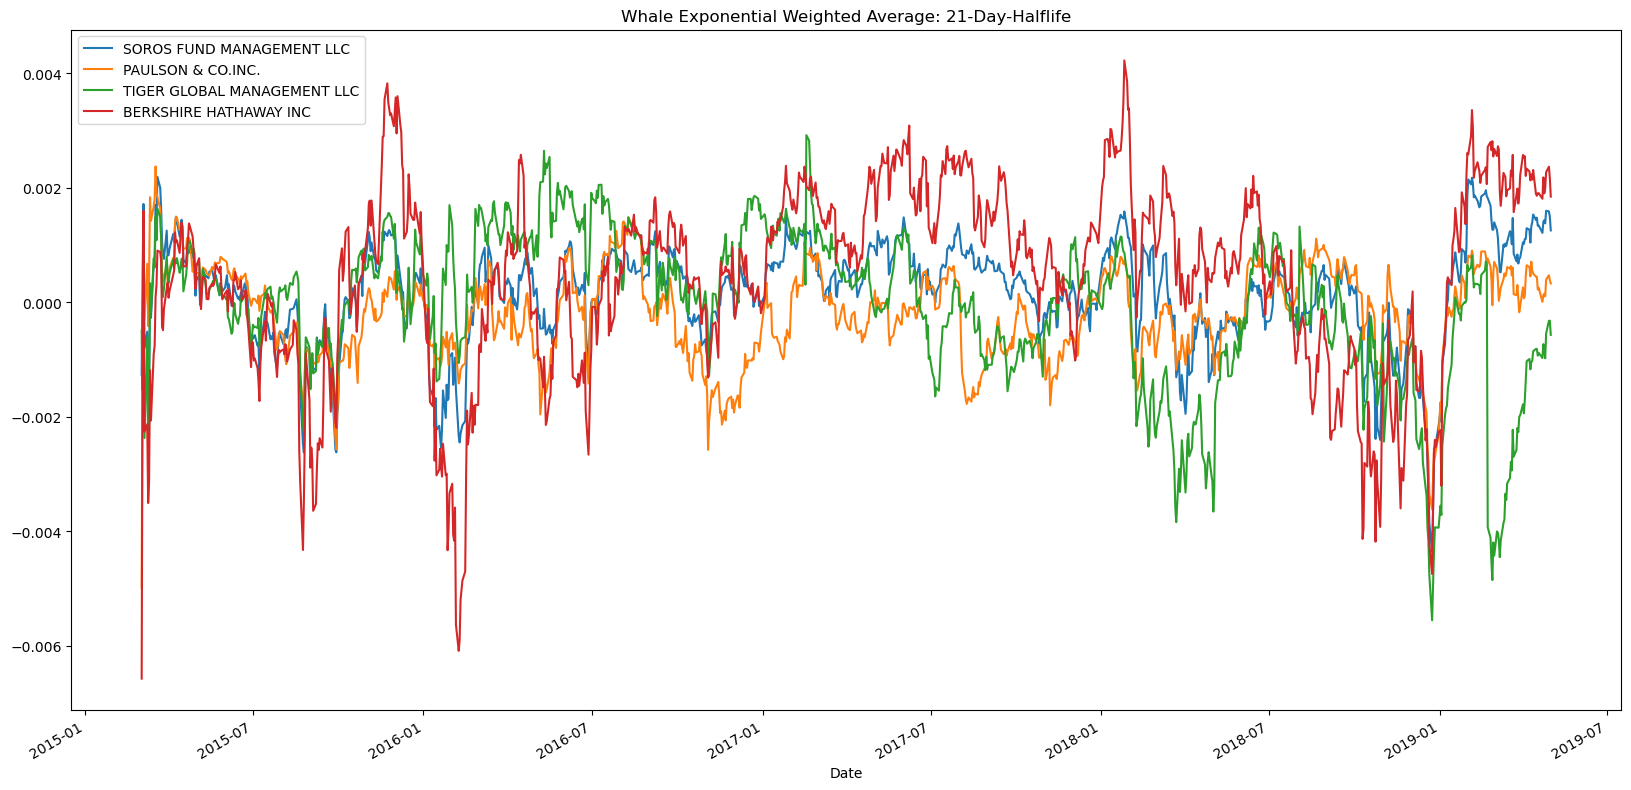

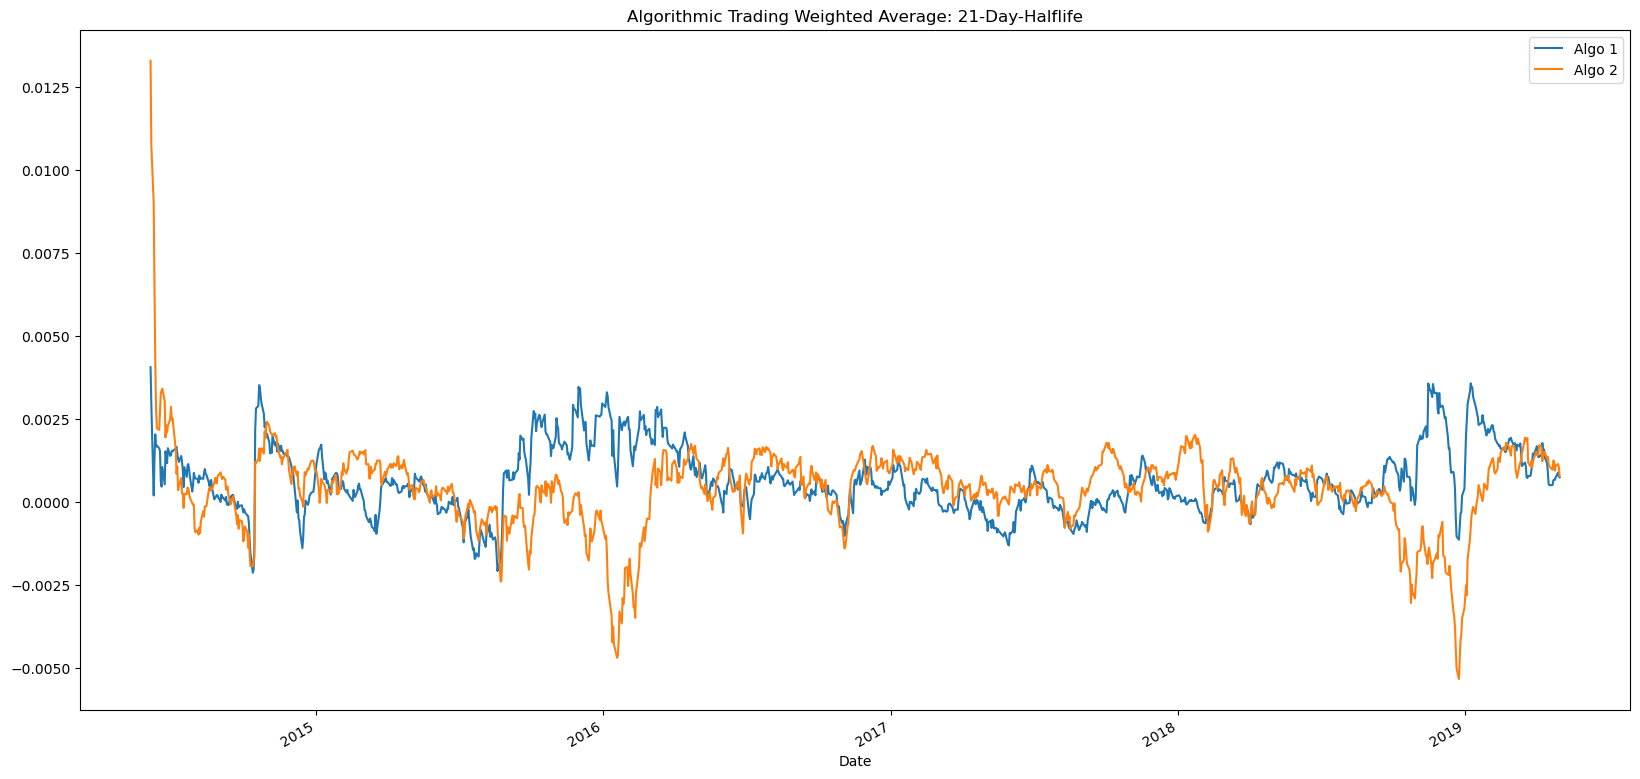

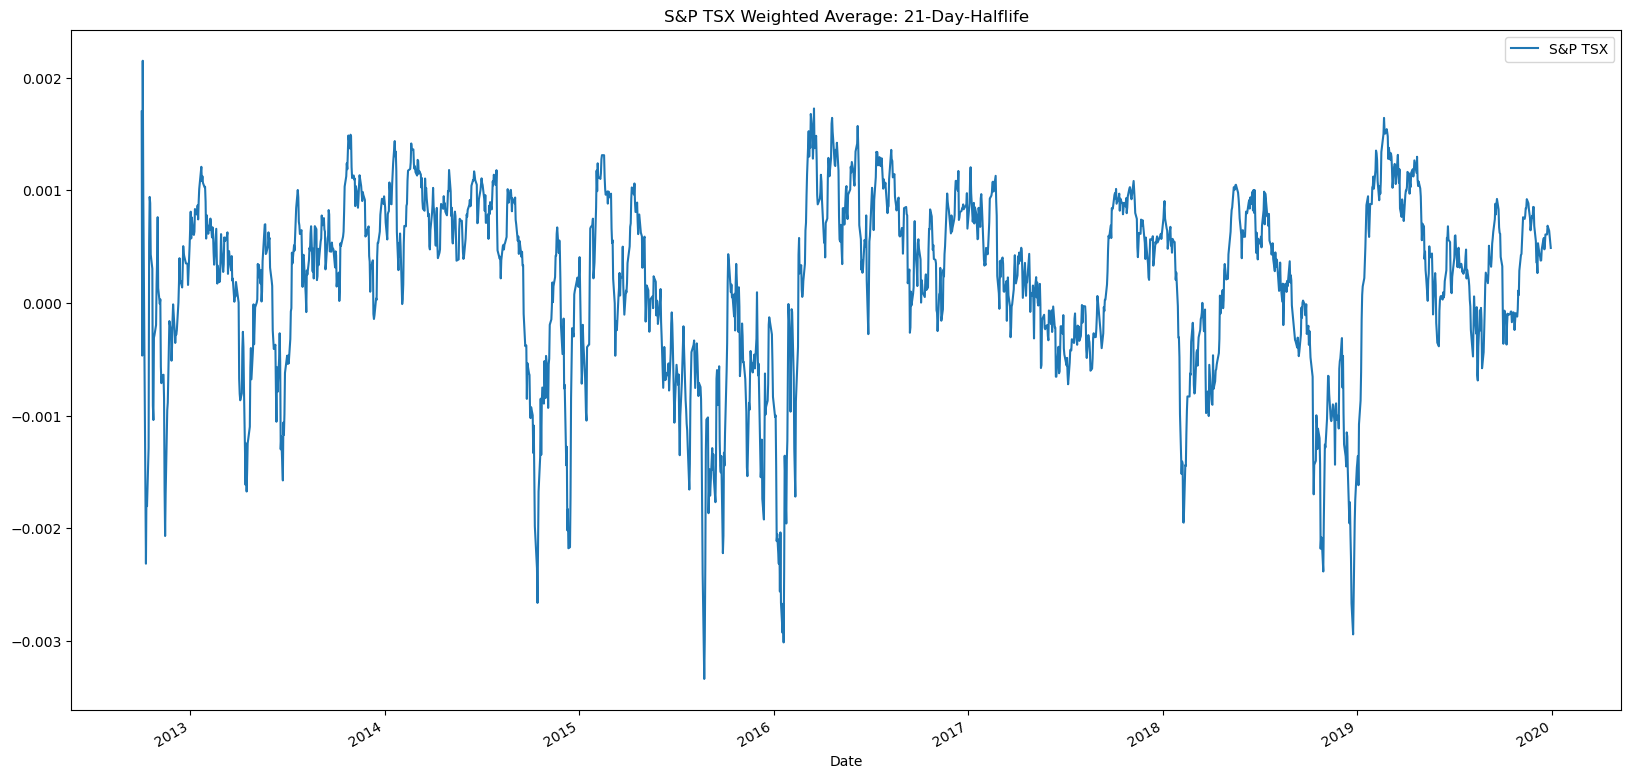

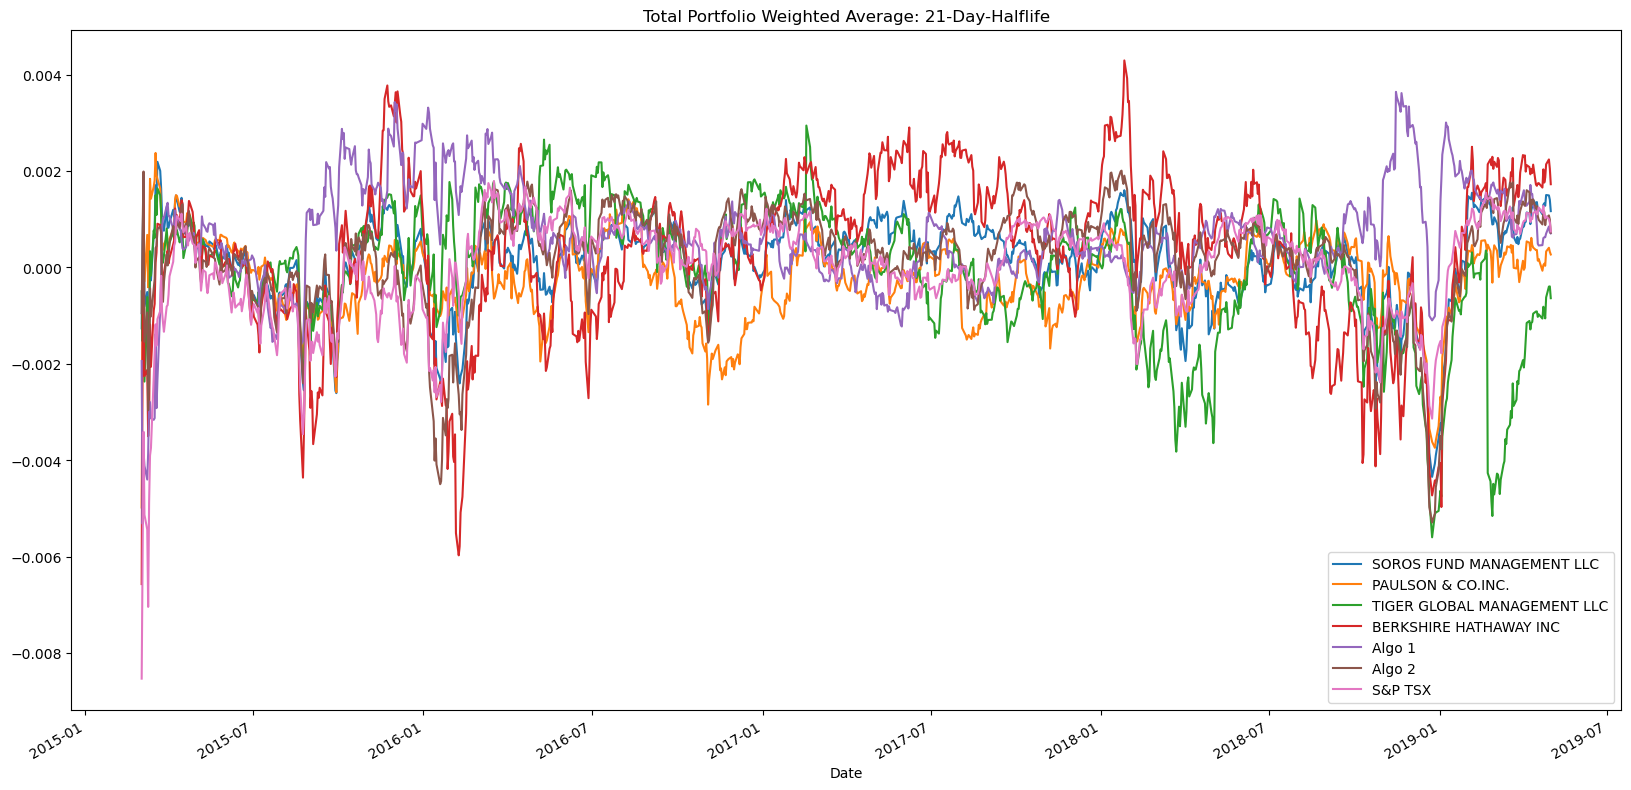

In [543]:
# Use `ewm` to calculate the rolling window
whale_df_ewm = whale_df.ewm(halflife=21).mean()
algo_df_ewm = algo_df.ewm(halflife=21).mean()
sp_tsx_df_ewm = sp_tsx_df.ewm(halflife=21).mean()
was_combined_df_ewm = was_combined_df.ewm(halflife=21).mean()

whale_df_ewm.plot(figsize = (20,10), kind ='line', title='Whale Exponential Weighted Average: 21-Day-Halflife')
algo_df_ewm.plot(figsize = (20,10), kind ='line', title='Algorithmic Trading Weighted Average: 21-Day-Halflife')
sp_tsx_df_ewm.plot(figsize = (20,10), kind ='line', title='S&P TSX Weighted Average: 21-Day-Halflife')
was_combined_df_ewm.plot(figsize = (20,10), kind ='line', title='Total Portfolio Weighted Average: 21-Day-Halflife')

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [544]:
# Annualized Sharpe Ratios
sharpe_ratios = (was_combined_df.mean() * 252) / (was_combined_df.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

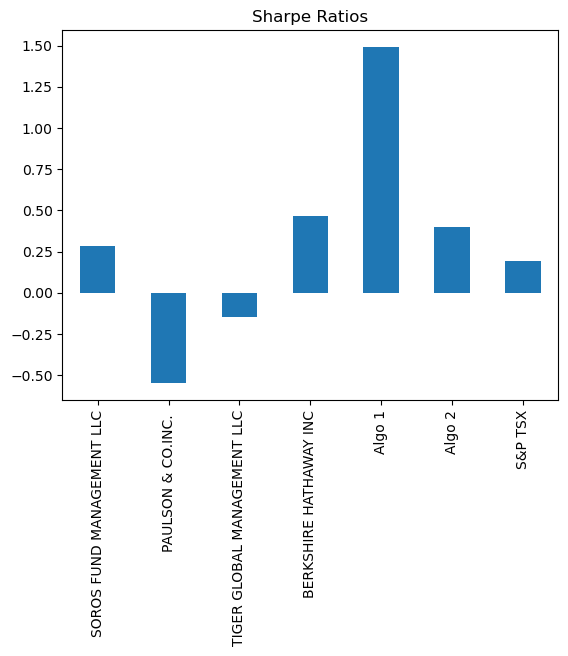

In [545]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [546]:
# Reading data from 1st stock
tesla_csv = Path("Resources/tesla_returns.csv")
tesla_df = pd.read_csv(tesla_csv,index_col="DATE", parse_dates=True, infer_datetime_format=True)

In [547]:
# Reading data from 2nd stock
chevron_csv = Path("Resources/chevron_returns.csv")
chevron_df = pd.read_csv(chevron_csv,index_col="DATE", parse_dates=True, infer_datetime_format=True)

In [548]:
# Reading data from 3rd stock
aramco_csv = Path("Resources/aramco_returns.csv")
aramco_df = pd.read_csv(aramco_csv,index_col="DATE", parse_dates=True, infer_datetime_format=True)

In [549]:
# Reading data from 4th stock
atlassian_csv = Path("Resources/atlassian_returns.csv")
atlassian_df= pd.read_csv(atlassian_csv,index_col="DATE", parse_dates=True, infer_datetime_format=True)

In [550]:
# Reading data from 5th stock
fujifilm_csv = Path("Resources/fujifilm_returns.csv")
fujifilm_df = pd.read_csv(fujifilm_csv,index_col="DATE", parse_dates=True, infer_datetime_format=True)

In [551]:
# Combine all stocks in a single DataFrame
watson_combined_df = pd.concat([tesla_df, chevron_df, aramco_df, atlassian_df, fujifilm_df], axis='columns', join='inner')

In [552]:
# Reorganize portfolio data by having a column per symbol
watson_combined_df.columns = ['TSLA', 'CVX', 'SAR', 'TEAM', 'FUJIY']

In [553]:
# Calculate daily returns
watson_combined_df_daily_returns = watson_combined_df.pct_change()

# Drop NAs
watson_combined_df_daily_returns.dropna(inplace=True)

# Display sample data
watson_combined_df_daily_returns.head(10)

TSLA       CVX       SAR      TEAM     FUJIY
DATE                                                        
2016-01-05  0.000672  0.008554  0.001290 -0.023349  0.012430
2016-01-06 -0.020134 -0.039505 -0.016753  0.010459 -0.027203
2016-01-07 -0.015068 -0.035436  0.002621 -0.002957 -0.023509
2016-01-08 -0.021558 -0.010720  0.003922  0.007416 -0.003801
2016-01-11 -0.014925 -0.016559 -0.017578 -0.001840 -0.000254
2016-01-12  0.010101  0.017086 -0.014579 -0.011062 -0.006107
2016-01-13 -0.046429 -0.009982 -0.017485 -0.003356  0.000256
2016-01-14  0.029963  0.050904  0.006845  0.004115  0.008190
2016-01-15 -0.005818 -0.021060 -0.024473 -0.061475 -0.018786
2016-01-19 -0.001463 -0.025816  0.004181 -0.046447  0.015265

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each 

In [554]:
# Set weights
weights = [1/3, 1/3, 1/3, 1/3, 1/3]

# Calculate portfolio return
watson_portfolio_returns = watson_combined_df_daily_returns.dot(weights)

# Display sample data
watson_portfolio_returns.head(10)

DATE
2016-01-05   -0.000135
2016-01-06   -0.031045
2016-01-07   -0.024783
2016-01-08   -0.008247
2016-01-11   -0.017052
2016-01-12   -0.001520
2016-01-13   -0.025665
2016-01-14    0.033339
2016-01-15   -0.043871
2016-01-19   -0.018093
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [555]:
# Join your returns DataFrame to the original returns DataFrame
final_combined_df = pd.concat([was_combined_df, watson_portfolio_returns],axis='columns', join='inner')
final_combined_df.columns = ['Soros Fund Management LLC', 'Paulson & Co. Inc.', 'Tiger Global Management LLC', 'Berkshire Hathaway Inc.', 'Algo 1', 'Algo 2', 'S&P TSX', 'Watson Wealth Management']

In [556]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_combined_df.isnull().sum()

Soros Fund Management LLC      0
Paulson & Co. Inc.             0
Tiger Global Management LLC    0
Berkshire Hathaway Inc.        0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
Watson Wealth Management       0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [557]:
# Calculate the annualized `std`
final_combined_df_std = final_combined_df.std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation of Combined Portfolios'}>

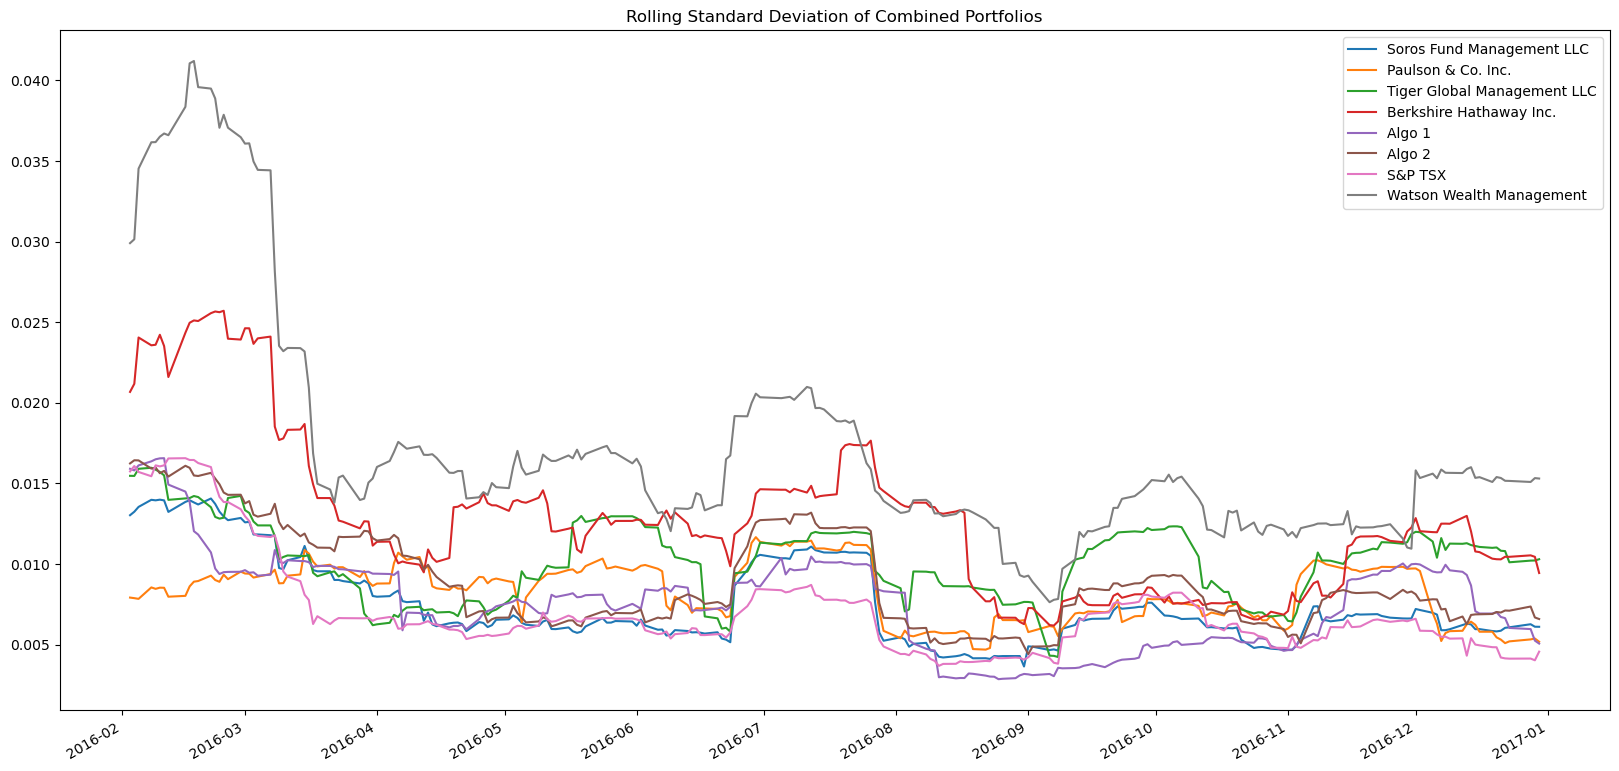

In [558]:
# Calculate rolling standard deviation with a 21-day window
rolling_final_combined_df_std = final_combined_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_final_combined_df_std.plot(figsize = (20,10), title = 'Rolling Standard Deviation of Combined Portfolios')

### Calculate and plot the correlation

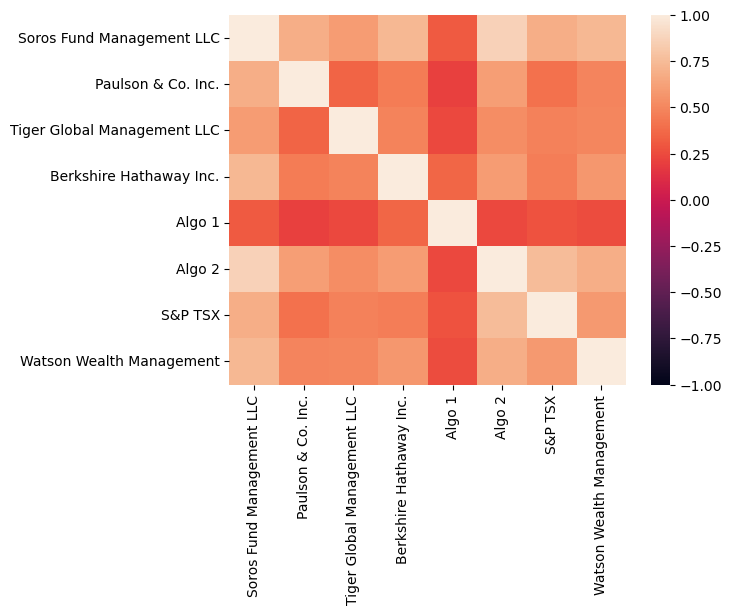

In [559]:
# Calculate and plot the correlation
correlation_final_combined = final_combined_df.corr()
correlation_final_combined_plot = sns.heatmap(correlation_final_combined, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Beta Trend'}>

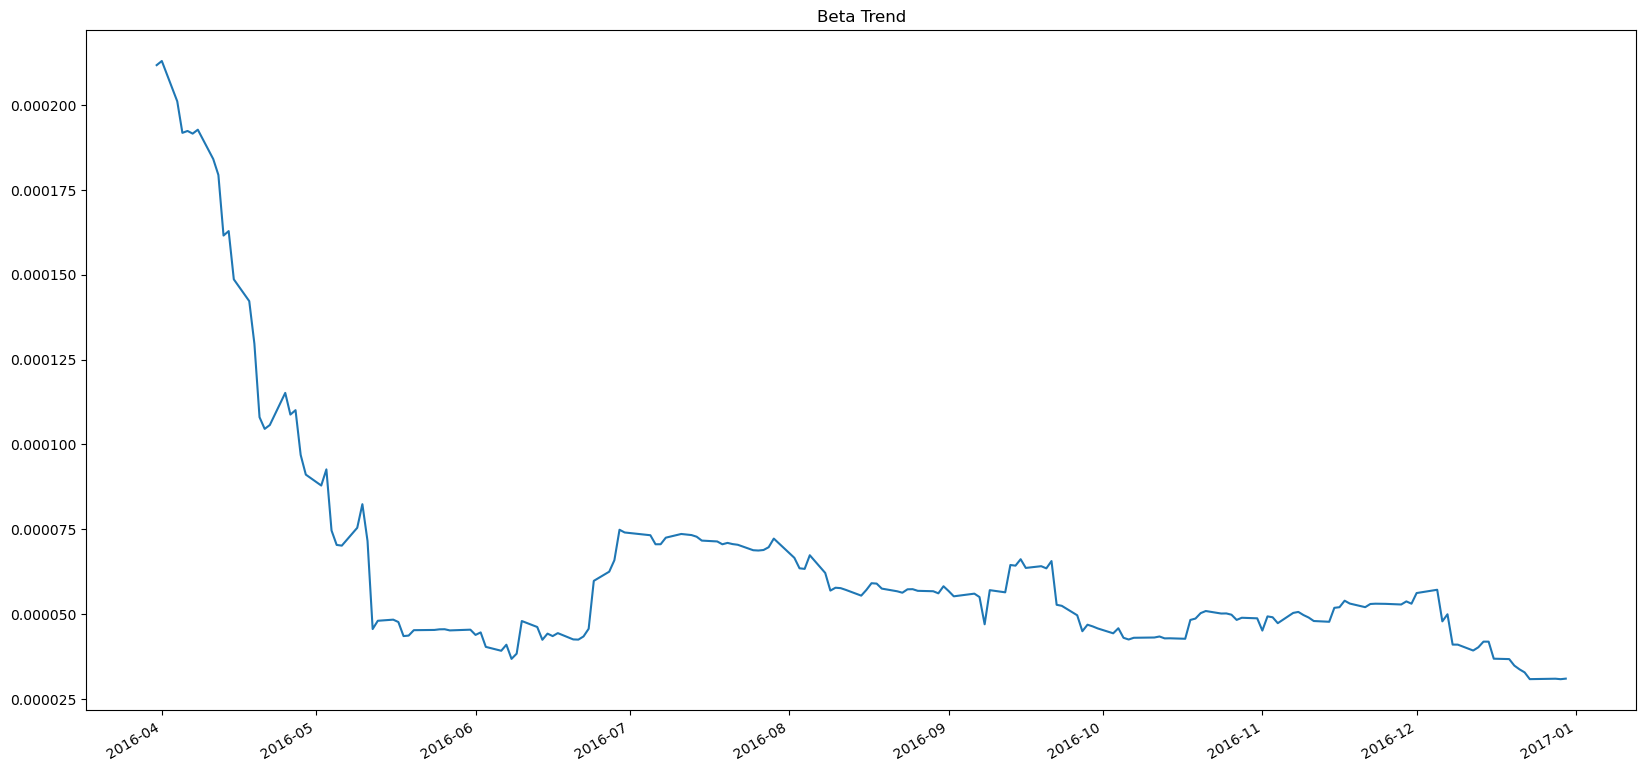

In [560]:
# Calculate and plot Beta
watson_portfolio_covariance = final_combined_df['Watson Wealth Management'].cov(final_combined_df['S&P TSX'])
beta_sp_and_watson = watson_portfolio_covariance / sp_variance
beta_sp_and_algo_plot = final_combined_df['Watson Wealth Management'].rolling(window=60).cov(final_combined_df['S&P TSX'])
beta_sp_and_algo_plot.plot(figsize = (20,10), title = 'Beta Trend')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [561]:
# Calculate Annualized Sharpe Ratios
final_combined_df_sharpe_ratios = (final_combined_df.mean() * 252) / (final_combined_df.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

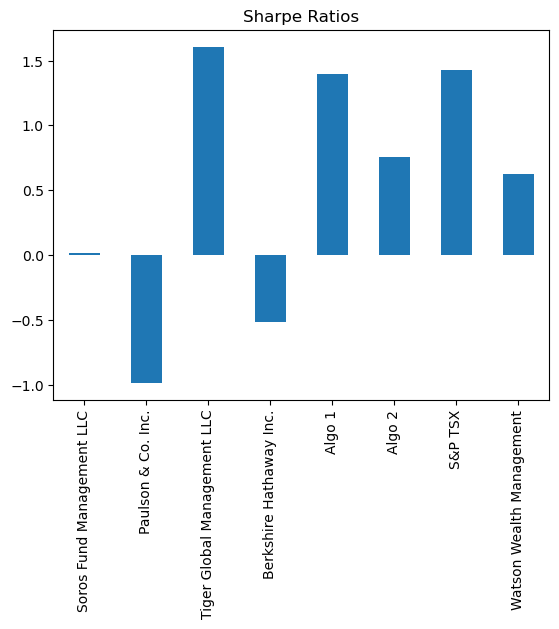

In [562]:
# Visualize the sharpe ratios as a bar plot
final_combined_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!